# Business Case

Based on given features we need to find which employees are likely to be non-performing of INX Future Inc.

                                             __Dataset Attritions__

                                                    __Preface__
                                                    
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider 
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 
years. INX human resource policies are considered as employee friendly and widely perceived as best 
practices in the industry.                                                   

                                              __Domain Analysis__
                                              
Recent years, the employee performance indexes are not healthy and this is becoming a growing 
concerns among the top management. There has been increased escalations on service delivery and 
client satisfaction levels came down by 8 percentage points.
CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing 
employees as this would affect the employee morale of all the employees in general and may further 
reduce the performance. Also, the market perception best employer and thereby attracting best talents 
to join the company.
Mr. Brain decided to initiate a data science project , which analyses the current employee data and find 
the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects 
the findings of this project will help him to take right course of actions. He also expects a clear indicators 
of non performing employees, so that any penalization of non-performing employee, if required, may 
not significantly affect other employee morals                                              

In [6]:
#import libraries
import pandas as pd  # import pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np   # import numpy for working with mathematices part/numerical data
import matplotlib.pyplot as plt  # use for visulisation
%matplotlib inline
import seaborn as sns
import warnings  # ignore warnings
warnings.filterwarnings('ignore')

In [214]:
#data is in excel file so we have to call pd.read_excel from pandas
data = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")# load data
pd.set_option("display.max_columns",None) # For showing all columns

# Basic checks:-

In [217]:
data.head(pd.set_option('display.max_columns',None))#to diplay all columns from dataset

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


In [10]:
data.tail()#Last Five rows show

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [11]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [12]:
data.describe(include=['O'])#It will give you info about categorical data/columns

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [13]:
data.info()#To check data type and null value of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### Insights from basic checks:-
* we do not have any null values
* Over18 is constant feature.
* Most of the columns having Discrete value.

# Exploratory Data Analysis(EDA)
##### Univariant Analysis

In [64]:
import numpy as np
import warnings

if not hasattr(np, 'VisibleDeprecationWarning'):
    class VisibleDeprecationWarning(UserWarning):
        pass
    np.VisibleDeprecationWarning = VisibleDeprecationWarning

In [66]:
import numpy as np
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()#Deflut arguments will generate to "Sweetviz_report.html"

Feature: Age                                 |██▊                                      | [  7%]   02:23 -> (32:14 left)
Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:02 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights from univariant analysis
* Employee between the age group 25-40 are the majority.
* Majority(41%) of the employee are from life science field and 32% are from medical field.
* 46% of the people are married, 32% single and the rest are divorced.
* More than 90% of the employees belong to Sales, research & develpoment and development.
* More than 22% of the employee are from Sales Excutive department and 20% of the employee are from developer department     and the rest of employee belong from rest of department.
* 70% of the employee travel raraely, 18% travel frequently rest non-traveler.
* Almost 70% of the employee are nearer to the office i.e the distance from their home is lesser than or equal to 10.
* More than 60% of the employee have educational qualification level of 4 and 3.
* 60% of the employee are almost satisfied with environment condition of the office with 3 and 4 ratings.
* 60% of the employee have partial involvement in job and 24% have good involvement.
* 74% of the employee job level are 1 and 2.
* More than 60% employees seem to be satisfied with their job.
* 50% of the employees have worked for less than or equal to 1 company which implies they are freshers.
* 70% employee don't do overtime.
* Employee last salary hike 12 % which less salary hike of company and 25% is the highest salary hike of company.
* More than 60% employees seem to be satisfied with their relatioship.
* More than 60% employees having work experience of more than or equal to 5.
* More than 60% employees work life balanced rating are 3.
* Only 30% employee who took job recently within 0 to 3.otherwise rest of employee doing job more than 3 years in this       company.
* 85% employee don't want to leave their job.
* Gender count: 60% male 40% female.

#### Bivariate Analysis 
* Cheking relationship of all variables with respect to target variable

In [70]:
data.info()#To check data type and null value of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [72]:
df = data[["Gender","EducationBackground","MaritalStatus",
           "EmpDepartment","EmpJobRole","BusinessTravelFrequency",
           "OverTime","Attrition"]]

In [74]:
categorical_col = []
for column in data.columns: #for loop to acess columns form dataset
    if data[column].dtype == object and len(data[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50
        categorical_col.append(column)#appending those columns in the list who statisfy the condition
        print(f"{column} : {data[column].unique()}")#output
        print("--------------------------------------------")

Gender : ['Male' 'Female']
--------------------------------------------
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
--------------------------------------------
MaritalStatus : ['Single' 'Married' 'Divorced']
--------------------------------------------
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
--------------------------------------------
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
--------------------------------------------
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
---------------------

In [76]:
df

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


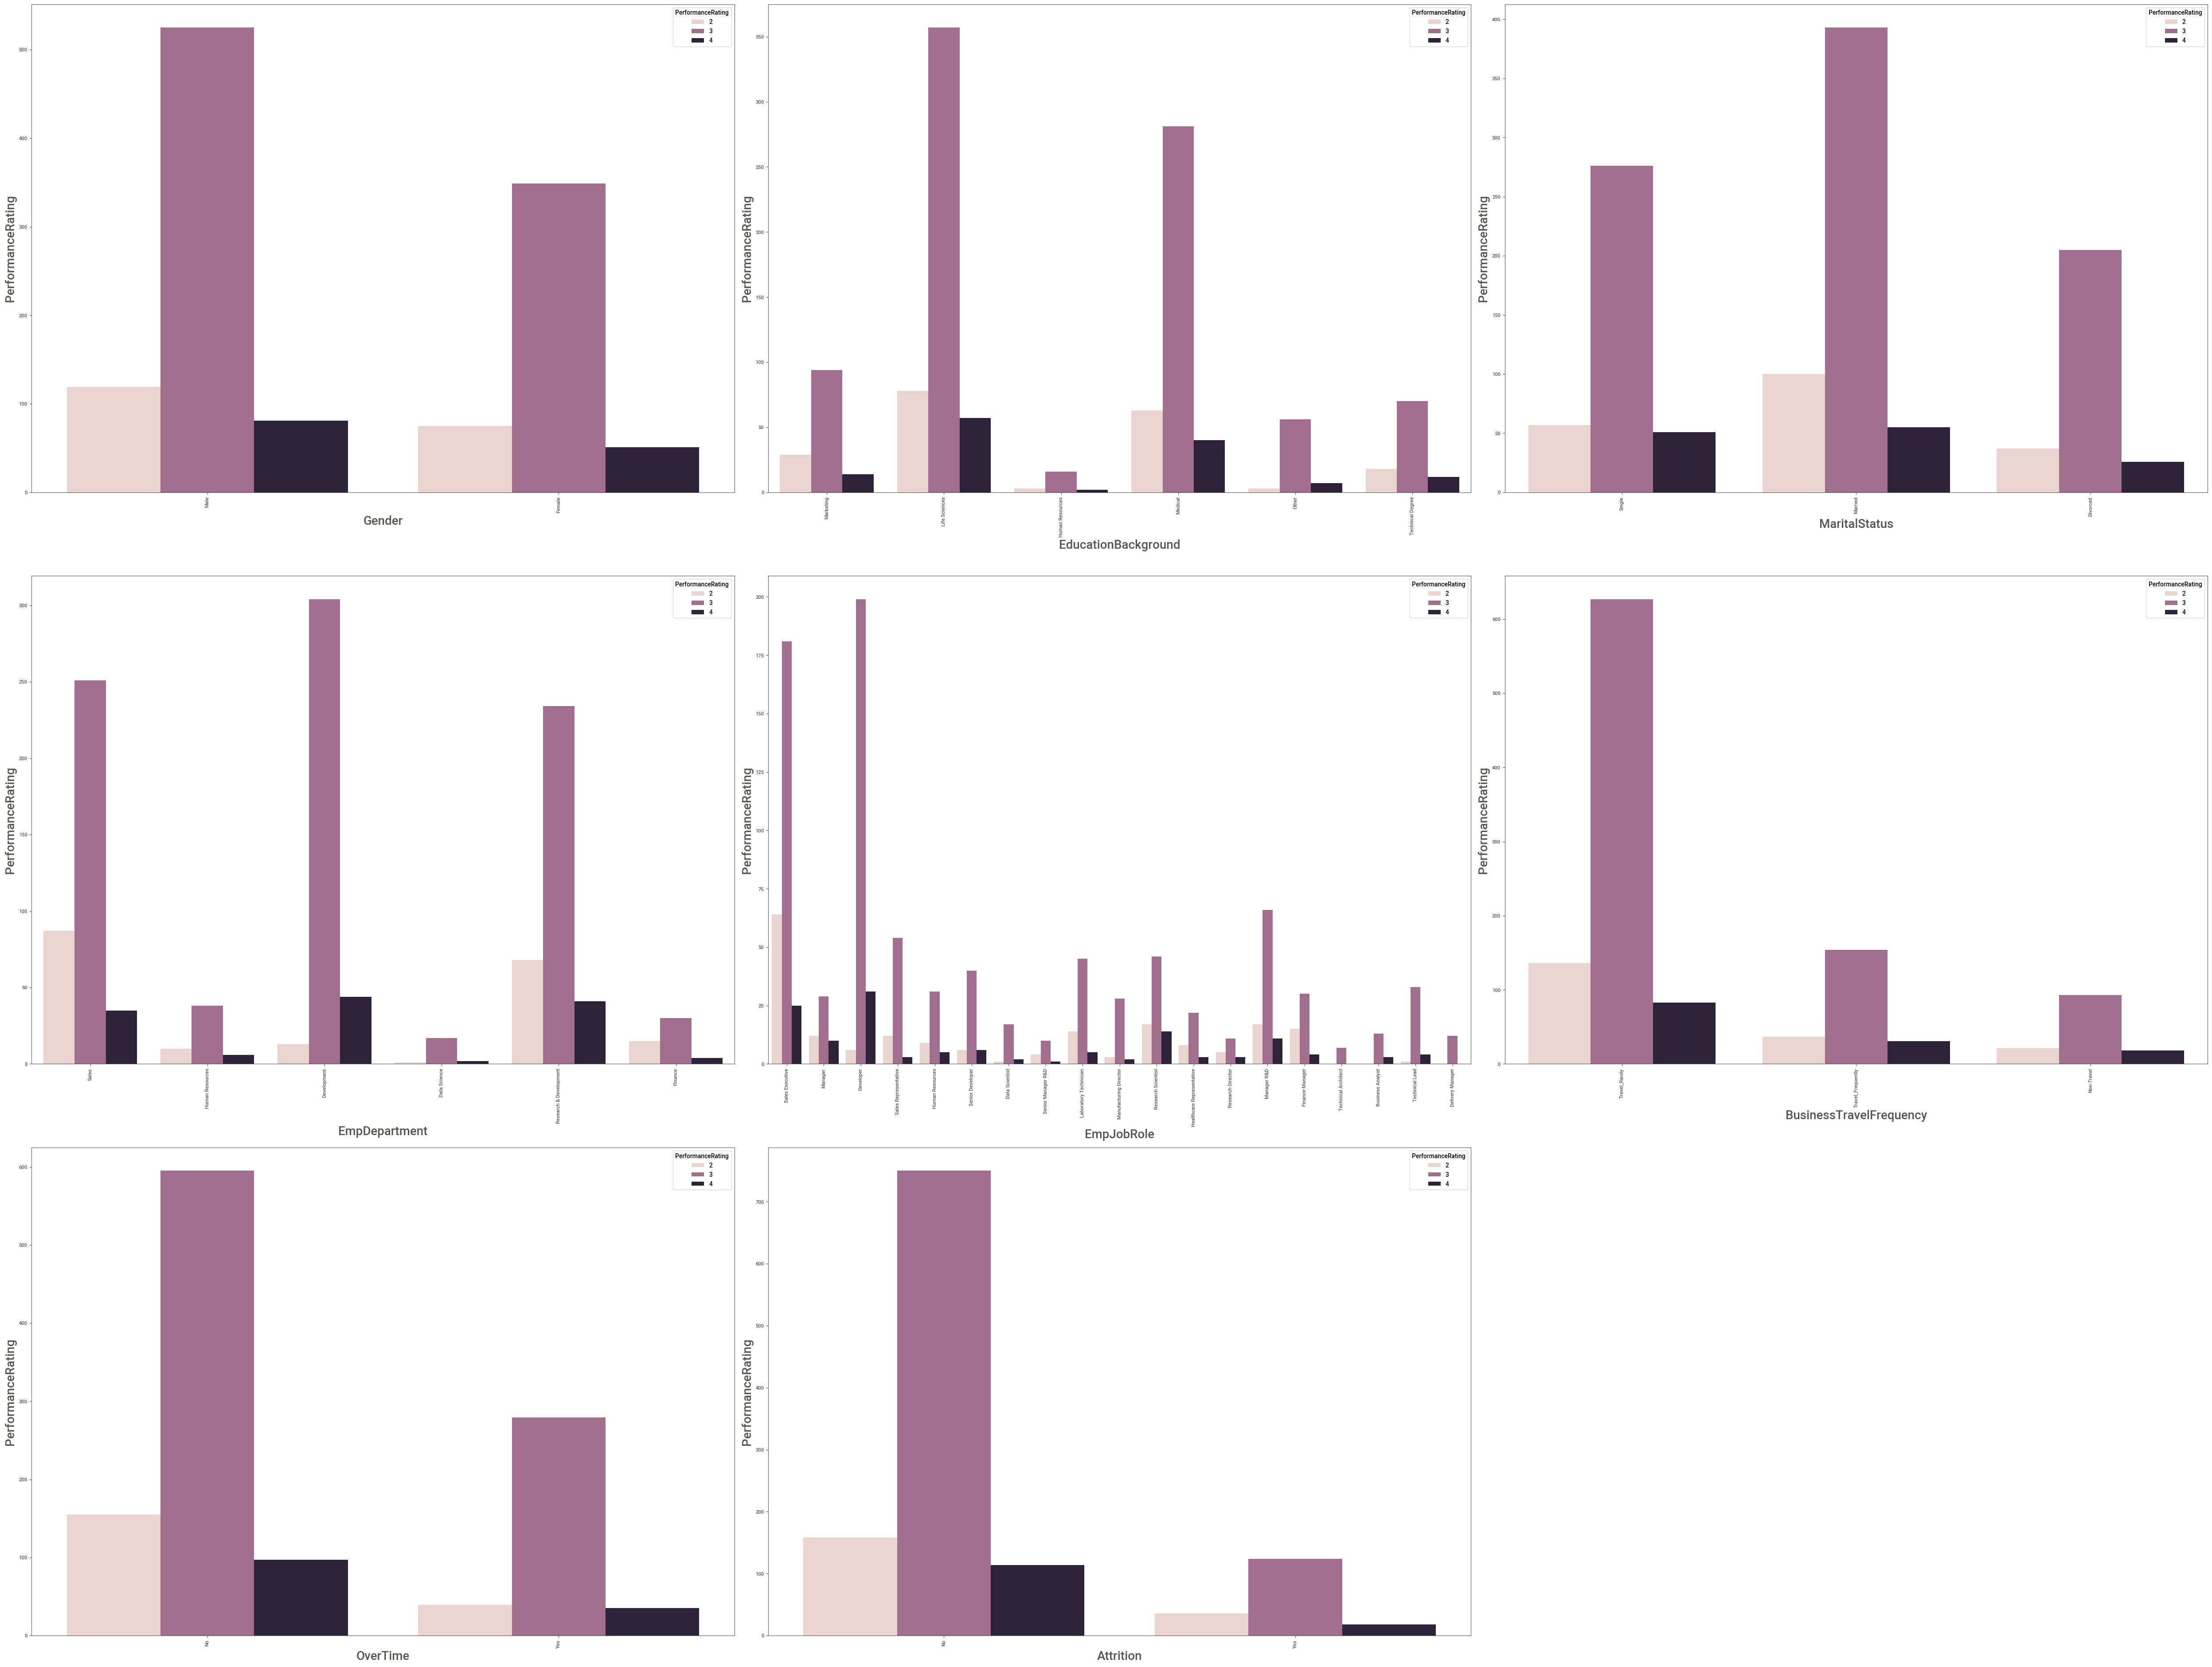

In [78]:
# Plotting how every categorical feature correlate with the "target"
plt.figure(figsize=(50,50))# canva size
plotnumber = 1 # count variable 

for column in df: # for loop to acess columns from df
    if plotnumber<=16: #cheking whether count variable is less than 16 or not 
        ax = plt.subplot(4,3,plotnumber) # plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=df[column].dropna(axis=0),
                hue=data.PerformanceRating)#plotting count plot
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font
        plt.xticks(rotation=90) 
        plt.ylabel("PerformanceRating",fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1
plt.tight_layout()
        
    

### Insights
* More male employee performance rating seems to bad.
* Majority of Life Science,Medical and Marketing employee performance rating seems to bad.
* Married employee performance rating seems to bad.
* Majority of Sales and Research & development employee seems to bad.
* Majority of Sales Excutive,Manager,Research Scientist,Research Director,Health Care Representative and Finance manager     employee performance seems to bad.
* Employee who travel frequently are performance seems to bad.
* Employee who don't do overtime their performance seems to bad.
* Employee who want to leave their job their performance seems to bad.

In [81]:
numerical_col = []#list for continous columns
for column in data.columns:#acessing columns from datasets
    if data[column].dtype == int and len(data[column].unique()) >= 10: #checking whether it's datatype is int and count of unique label greater than 10  
        numerical_col.append(column) # inserting those columns in list                                      
        

In [83]:
numerical_col#printing list which contain continous columns

['Age',
 'DistanceFromHome',
 'EmpHourlyRate',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'TotalWorkExperienceInYears',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [85]:
df1 = data[["EmpEducationLevel","EmpEnvironmentSatisfaction","EmpJobInvolvement","EmpJobLevel","EmpJobSatisfaction","NumCompaniesWorked",
             "EmpRelationshipSatisfaction","TrainingTimesLastYear","EmpWorkLifeBalance"]]# discrete columns

In [87]:
df1

,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance
0,3,4,3,2,4,1,4,2,2
1,4,4,3,2,1,2,4,2,3
2,4,4,2,3,1,5,3,2,3
3,4,2,2,5,4,3,2,2,2
4,4,1,3,2,1,8,4,1,3
...,...,...,...,...,...,...,...,...,...
1195,1,4,4,2,4,1,2,3,3
1196,2,4,4,1,4,3,1,2,3
1197,1,4,4,1,3,1,3,3,3
1198,3,4,2,3,2,1,2,3,4


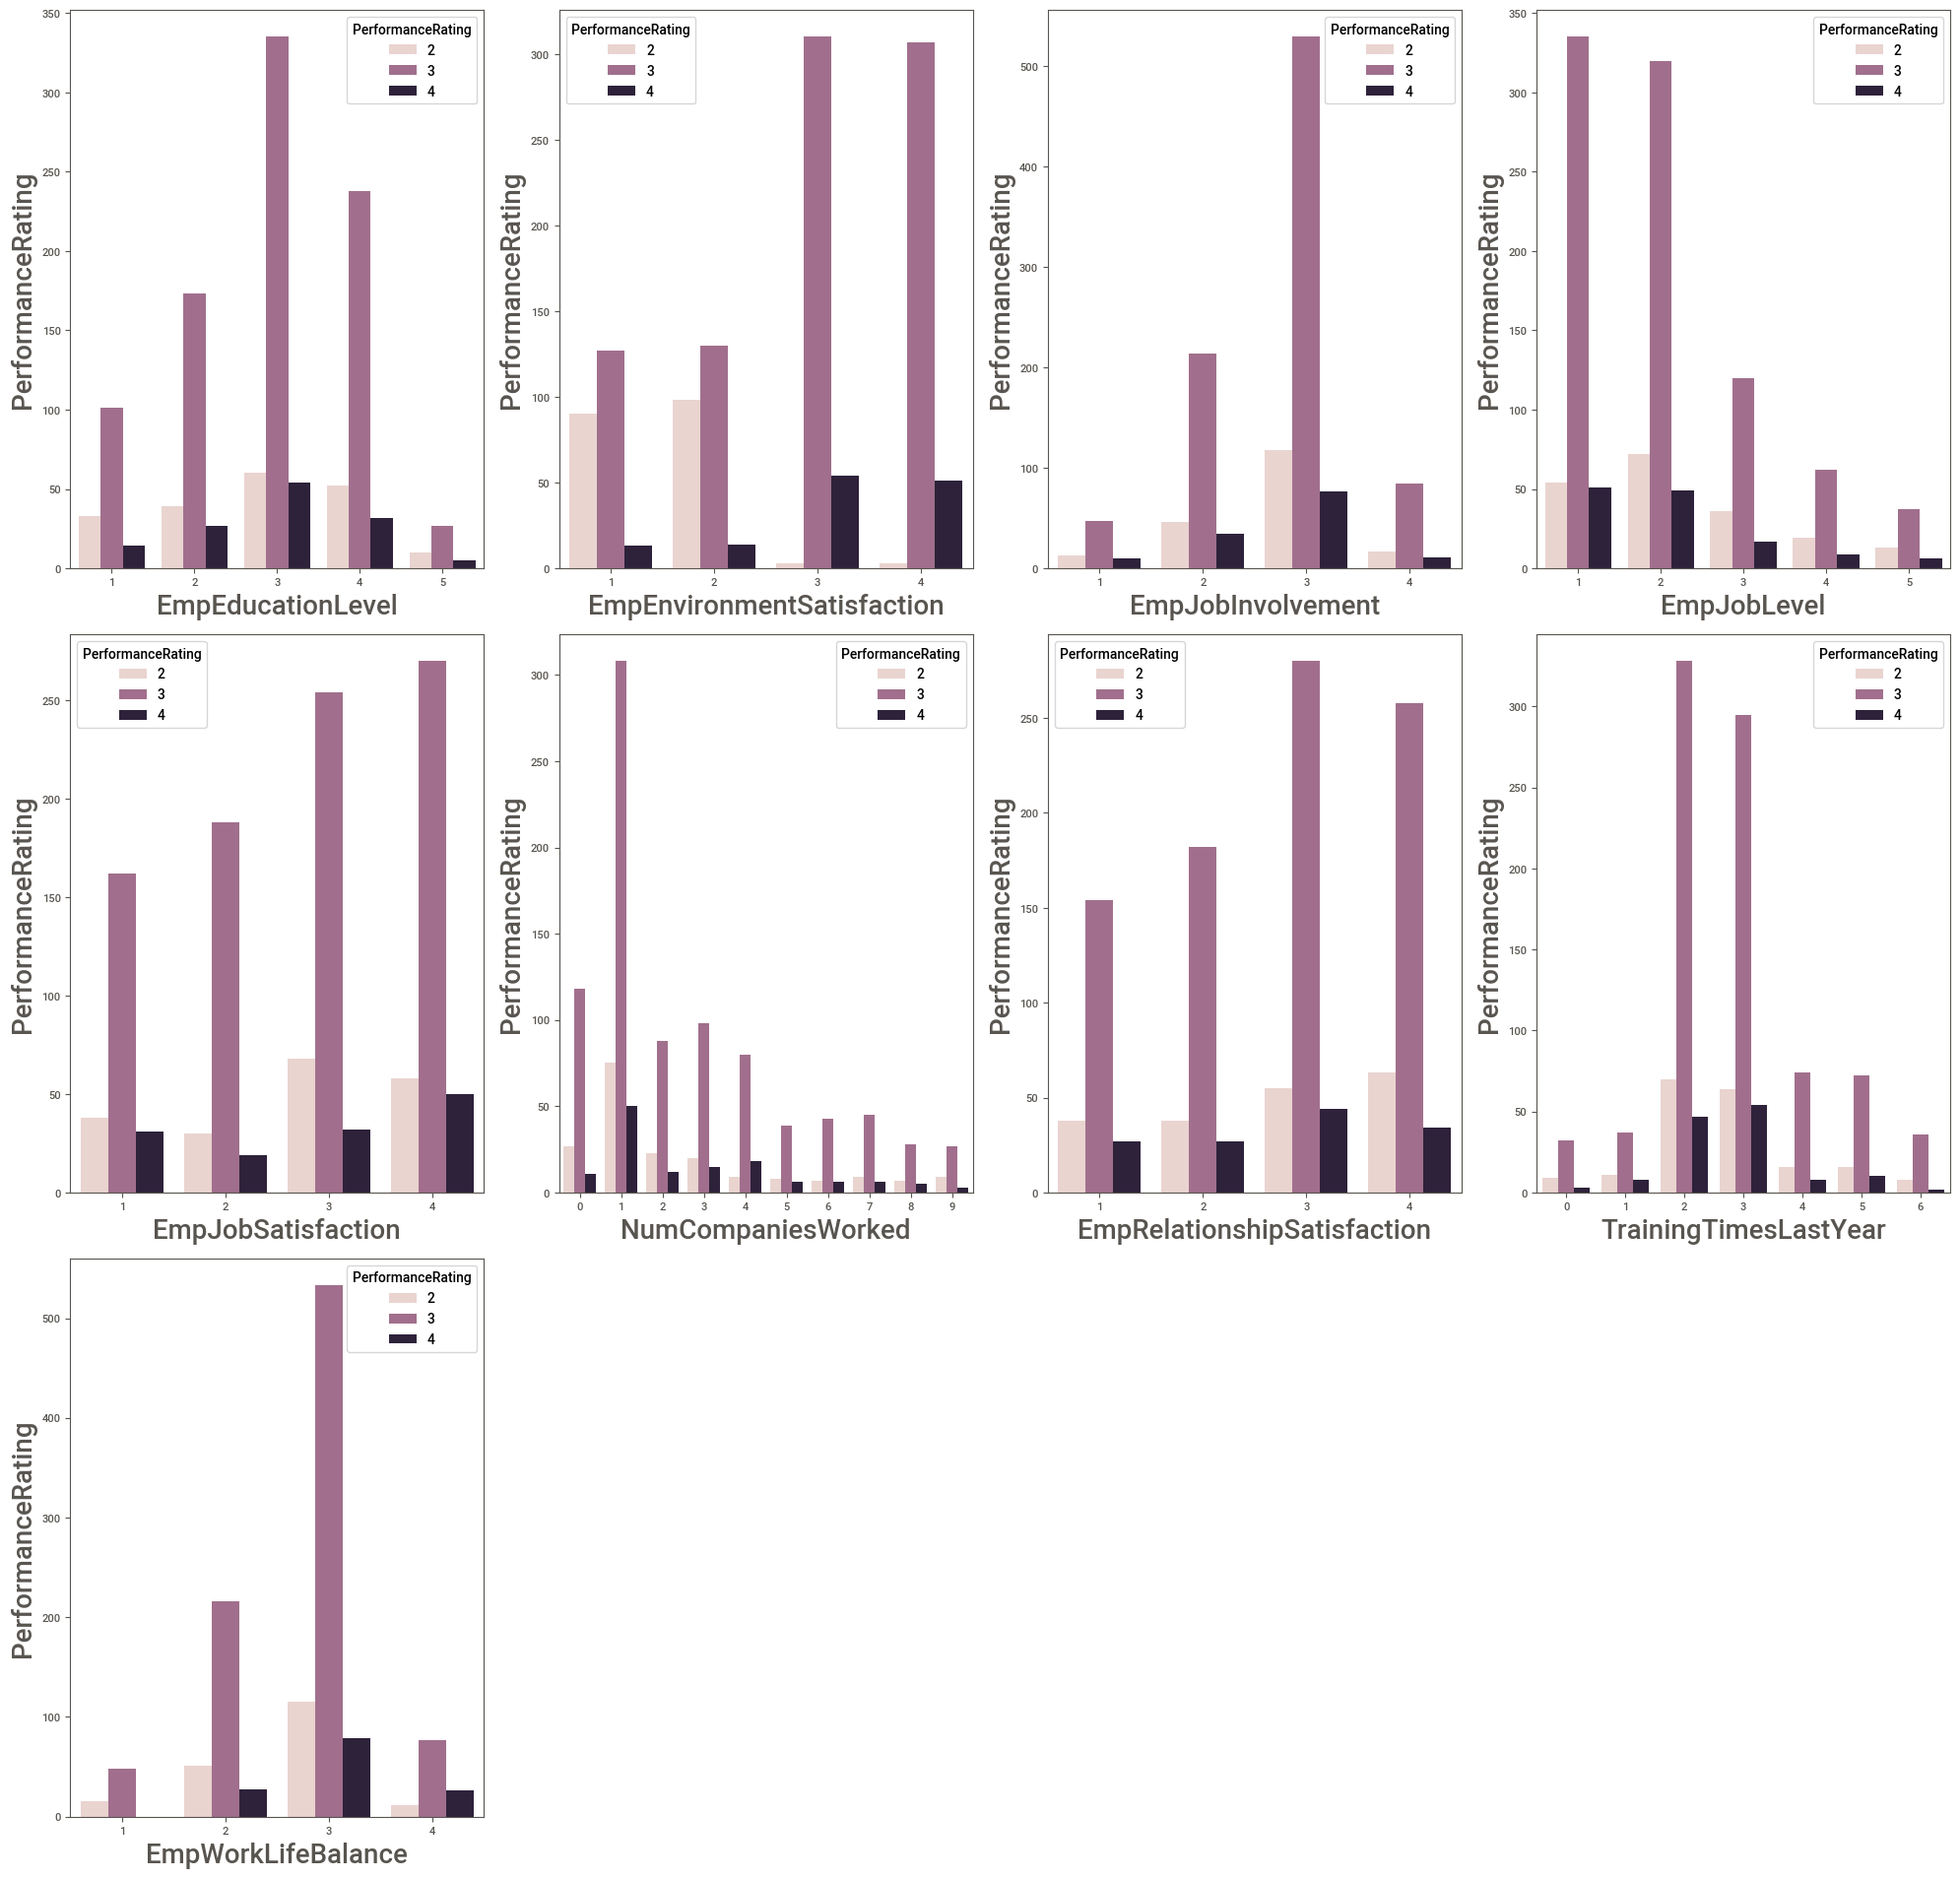

In [89]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(20,25))#canvas size
plotnumber = 1

for column in df1:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=df1[column].dropna(axis=0)
                        ,hue=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PerformanceRating',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Insights:-
* Employee whose eduaction level are 1 and 5 their performance seems to bad.
* Employee who gave environment satisfaction rating 1 and 2 their performance seems to bad.
* Employee whose job Involvement is low their performance seems to bad.
* Employee whose job level on 5 their performance seems to bad.
* Employee who worked more than 5 or 6 company their perfomance seems to bad.
* Employee whose work life balanced rating is low their performance seems to bad.

### Bivariant analysis of continuous variables

In [178]:
#continuous variables/columns
df2 = data[["Age","DistanceFromHome","EmpHourlyRate","EmpLastSalaryHikePercent","TotalWorkExperienceInYears",
              "ExperienceYearsAtThisCompany","ExperienceYearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]

In [180]:
df2

,Age,DistanceFromHome,EmpHourlyRate,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,10,55,12,10,10,7,0,8
1,47,14,42,12,20,7,7,1,7
2,40,5,48,21,20,18,13,1,12
3,41,10,73,15,23,21,6,12,6
4,60,16,84,14,10,2,2,2,2
...,...,...,...,...,...,...,...,...,...
1195,27,3,71,20,6,6,5,0,4
1196,37,10,80,17,4,1,0,0,0
1197,50,28,74,11,20,20,8,3,8
1198,34,9,46,14,9,8,7,7,7


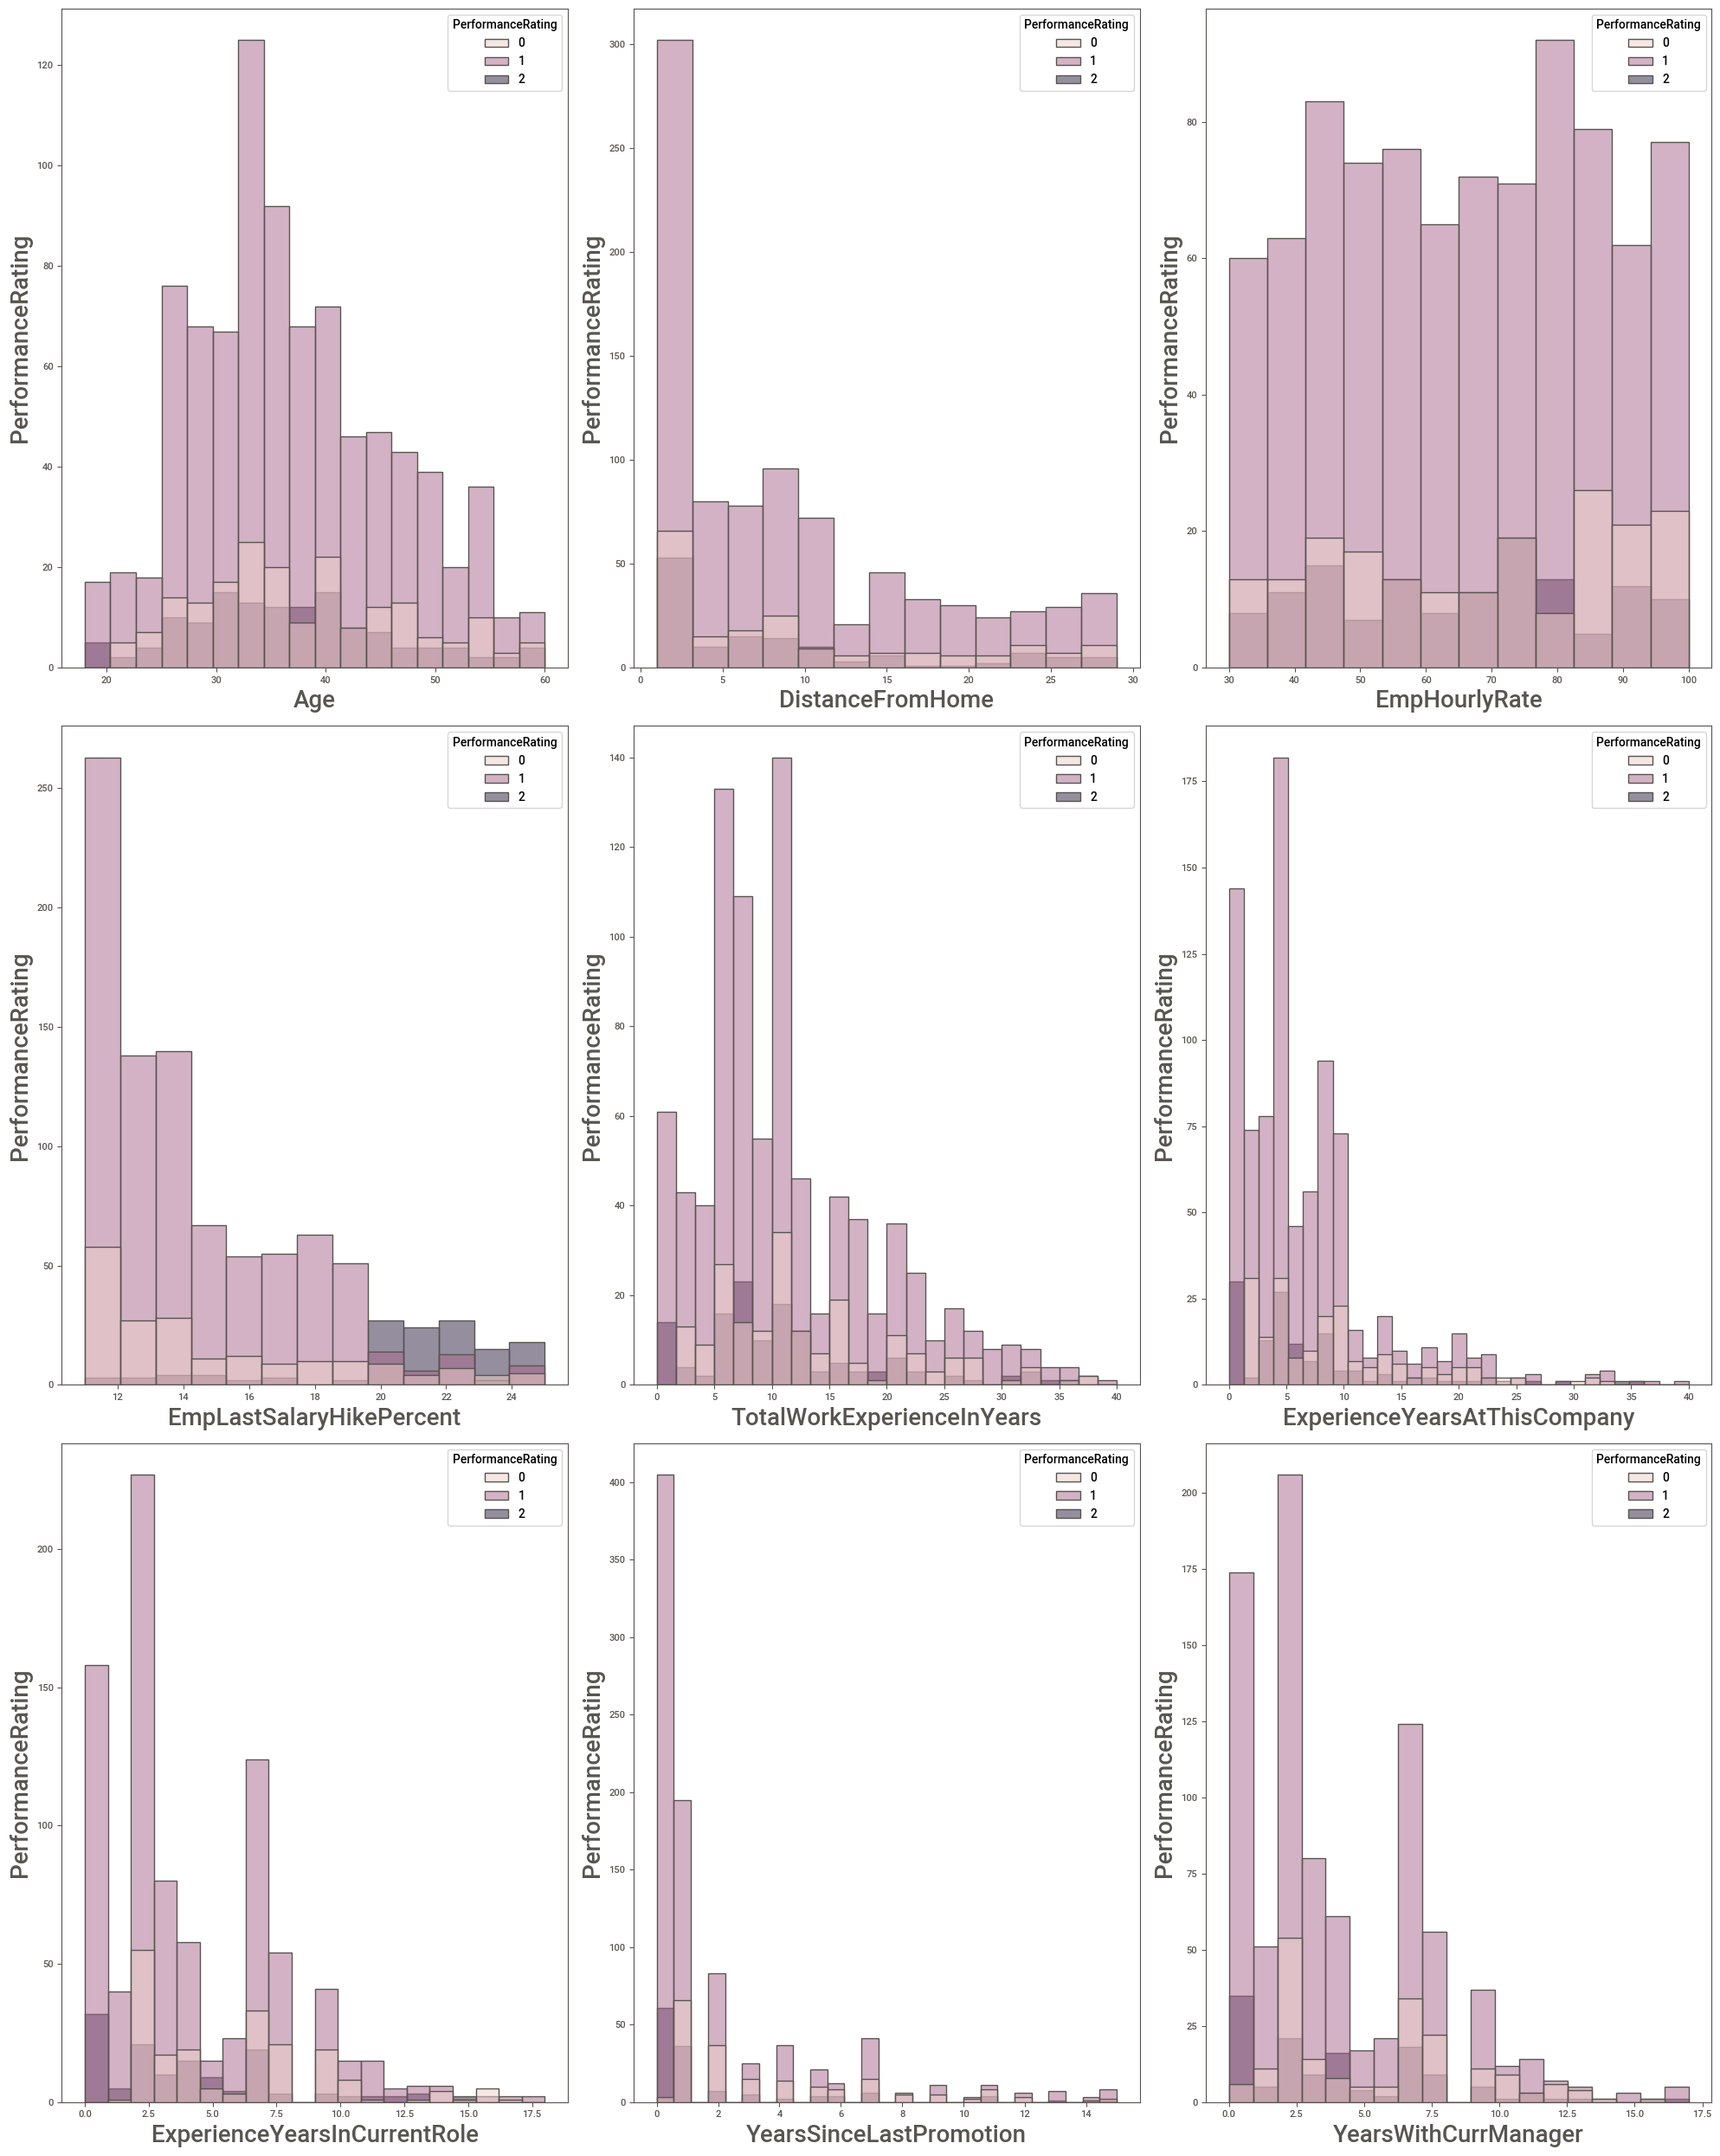

In [182]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in df2:#acessing columns form data2 DataFrame
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(3,3,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=df2[column].dropna(axis=0)# plotting hist plot and dropping null values,classification according to target
                        ,hue=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('PerformanceRating',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

### Insights:-
* Employee who cover more than 15km for coming office their performance is seems to bad.
* Employee whose hourly rate are more than 80 their performance seems to bad.
* Employee whose salary hike percentage are less than 20 their performance seems to bad.
* Employee whose experience more than 15 and less than 25 thier performance seems to bad.
* Employee who got promoted since last 4 year their performance seems to bad.

## Final Conclusions:-

__here performance rating are 2,3,4__ So 2 is minimum value of target ,So we consider that it's bad performance.

* Gender : The Male and female are almost same in their performance.
* EducationBackground :-Majority of Life Science,Medical and Marketing employee seems to their performance are bad.
* MaritalStatus:-Employee who are married semms to their performance is bad.  
* EmpDepartment:- Employee who are in Sales,Finance and Research & development employee seems to their performance are bad.
* BusinessTravelFrequency:- Employee who travel frequently and cover more than 15km their performance seems to bad.
* EmpEnvironmentSatisfaction:- Employee who give environment satisfaction rate 1 and 2 their performance seems to bad.
* EmpHourlyRate:- Employee who don't do overtime and who hourly rate are more than 80 their performance seems to bad.
* EmpLastSalaryHikePercent:- Employee whose salary hike percentage are less than 20 their performance seems to bad.
* ExperienceYearsAtThisCompany:-Employee whose experience more than 15 and less than 25 thier performance seems to bad.
* ExperienceYearsInCurrentRole:-Employee whose current experience is more than 6 and less than 12 their performance seems     to bad.
* YearsSinceLastPromotion:- Employee who got not promoted since last 4 year their performance seems to bad.
* YearsWithCurrManager:- Employee who stay from together with Manager more than last 7 years their performance seems to bad
* EmpLastSalaryHikePercent,YearsSinceLastPromotion,ExperienceYearsInCurrentRole are top three features which are affecting   employee performance rating.

# Data Preprocessing
* Checking missing values/null values
* Conversion of Categorical variables

In [188]:
data.isnull().sum()# Null value cheking 

Age                             0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobLevel                     0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### Conversion of Categorical variables
* here i'm going to use label encoder or manually change categorical to numerical because most of the columns are discrete   and nominal.

#### 1. Gender

In [192]:
## Categorical data conversion
df.head()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No


In [219]:
#Manual Encoding for Gender feature
data.Gender=data.Gender.replace({'Male':1,'Female':0})


#### 2. EducationBackground

In [222]:
data.EducationBackground.unique()

array(['Marketing', 'Life Sciences', 'Human Resources', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [224]:
data.EducationBackground=data.EducationBackground.replace({'Other':1,'Technical Degree':0,"Medical":2,"Human Resources":3,"Life Sciences":4,"Marketing":5})
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,5,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,1,5,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,1,4,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,1,3,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,1,5,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


#### 3.MaritalStatus

In [227]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [229]:
## Manual encoding MaritalStatus feature
data.MaritalStatus = data.MaritalStatus.map({"Divorced":0,"Married":1,"Single":2})

#### 4.EmpDepartment

In [232]:
data.EmpDepartment.unique()#checking unique value in EmpDepartment column

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [234]:
## Manual encoding EmpDepartment feature
data.EmpDepartment=data.EmpDepartment.replace({'Research & Development':1,'Finance':0,"Data Science":2,"Development":3,
                                               "Human Resources":4,"Sales":5})


#### 4. EmpJobRole

In [237]:
data.EmpJobRole.unique()#checking unique value in EmpJobRole column

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [239]:
## Manual encoding EmpJobRole feature
data.EmpJobRole = data.EmpJobRole.map({'Sales Executive':18, 'Manager':17, 'Developer':16, 'Sales Representative':15,
       'Human Resources':13, 'Senior Developer':13, 'Data Scientist':12,
       'Senior Manager R&D':11, 'Laboratory Technician':10,
       'Manufacturing Director':9, 'Research Scientist':8,
       'Healthcare Representative':7, 'Research Director':6, 'Manager R&D':5,
       'Finance Manager':4, 'Technical Architect':3, 'Business Analyst':2,
       'Technical Lead':1, "Delivery Manager":0})

#### 5.BusinessTravelFrequency

In [242]:
data.BusinessTravelFrequency.value_counts()#checking unique value in BusinessTravelFrequency column

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [244]:
## Encoding BusinessTravel, this feature told the worker who travelled frequenlty has performance rate of job so let do the
##manual encoding
data.BusinessTravelFrequency=data.BusinessTravelFrequency.map({'Travel_Frequently':2,'Travel_Rarely':1,'Non-Travel':0})

#### 6. OverTime

In [247]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 

In [249]:
data.OverTime.unique()#checking unique value in OverTime column

array(['No', 'Yes'], dtype=object)

In [251]:
## Encoding OverTime
data.OverTime=label.fit_transform(data.OverTime)#label encoding

#### 7. Attrition

In [254]:
data.Attrition.unique()

array(['No', 'Yes'], dtype=object)

In [256]:
data.Attrition=label.fit_transform(data.Attrition)

In [258]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,5,2,5,18,1,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,5,2,5,18,1,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,4,1,5,18,2,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,3,0,4,17,1,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,5,2,5,18,1,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,2,0,5,18,2,3,1,4,71,4,2,4,1,1,20,2,6,3,3,6,5,0,4,0,4
1196,E100993,37,1,4,2,3,13,1,10,2,4,80,4,1,4,3,0,17,1,4,2,3,1,0,0,0,0,3
1197,E100994,50,1,2,1,3,13,1,28,1,4,74,4,1,3,1,1,11,3,20,3,3,20,8,3,8,0,3
1198,E100995,34,0,2,2,2,12,1,9,3,4,46,2,3,2,1,0,14,2,9,3,4,8,7,7,7,0,3


In [259]:
# we use manually encoding in this columns because it's not in a perfect way and some of the algorithmns will not take like XG BOOST
data.PerformanceRating = data.PerformanceRating.map({2:0,3:1,4:2})

# Feature Selection

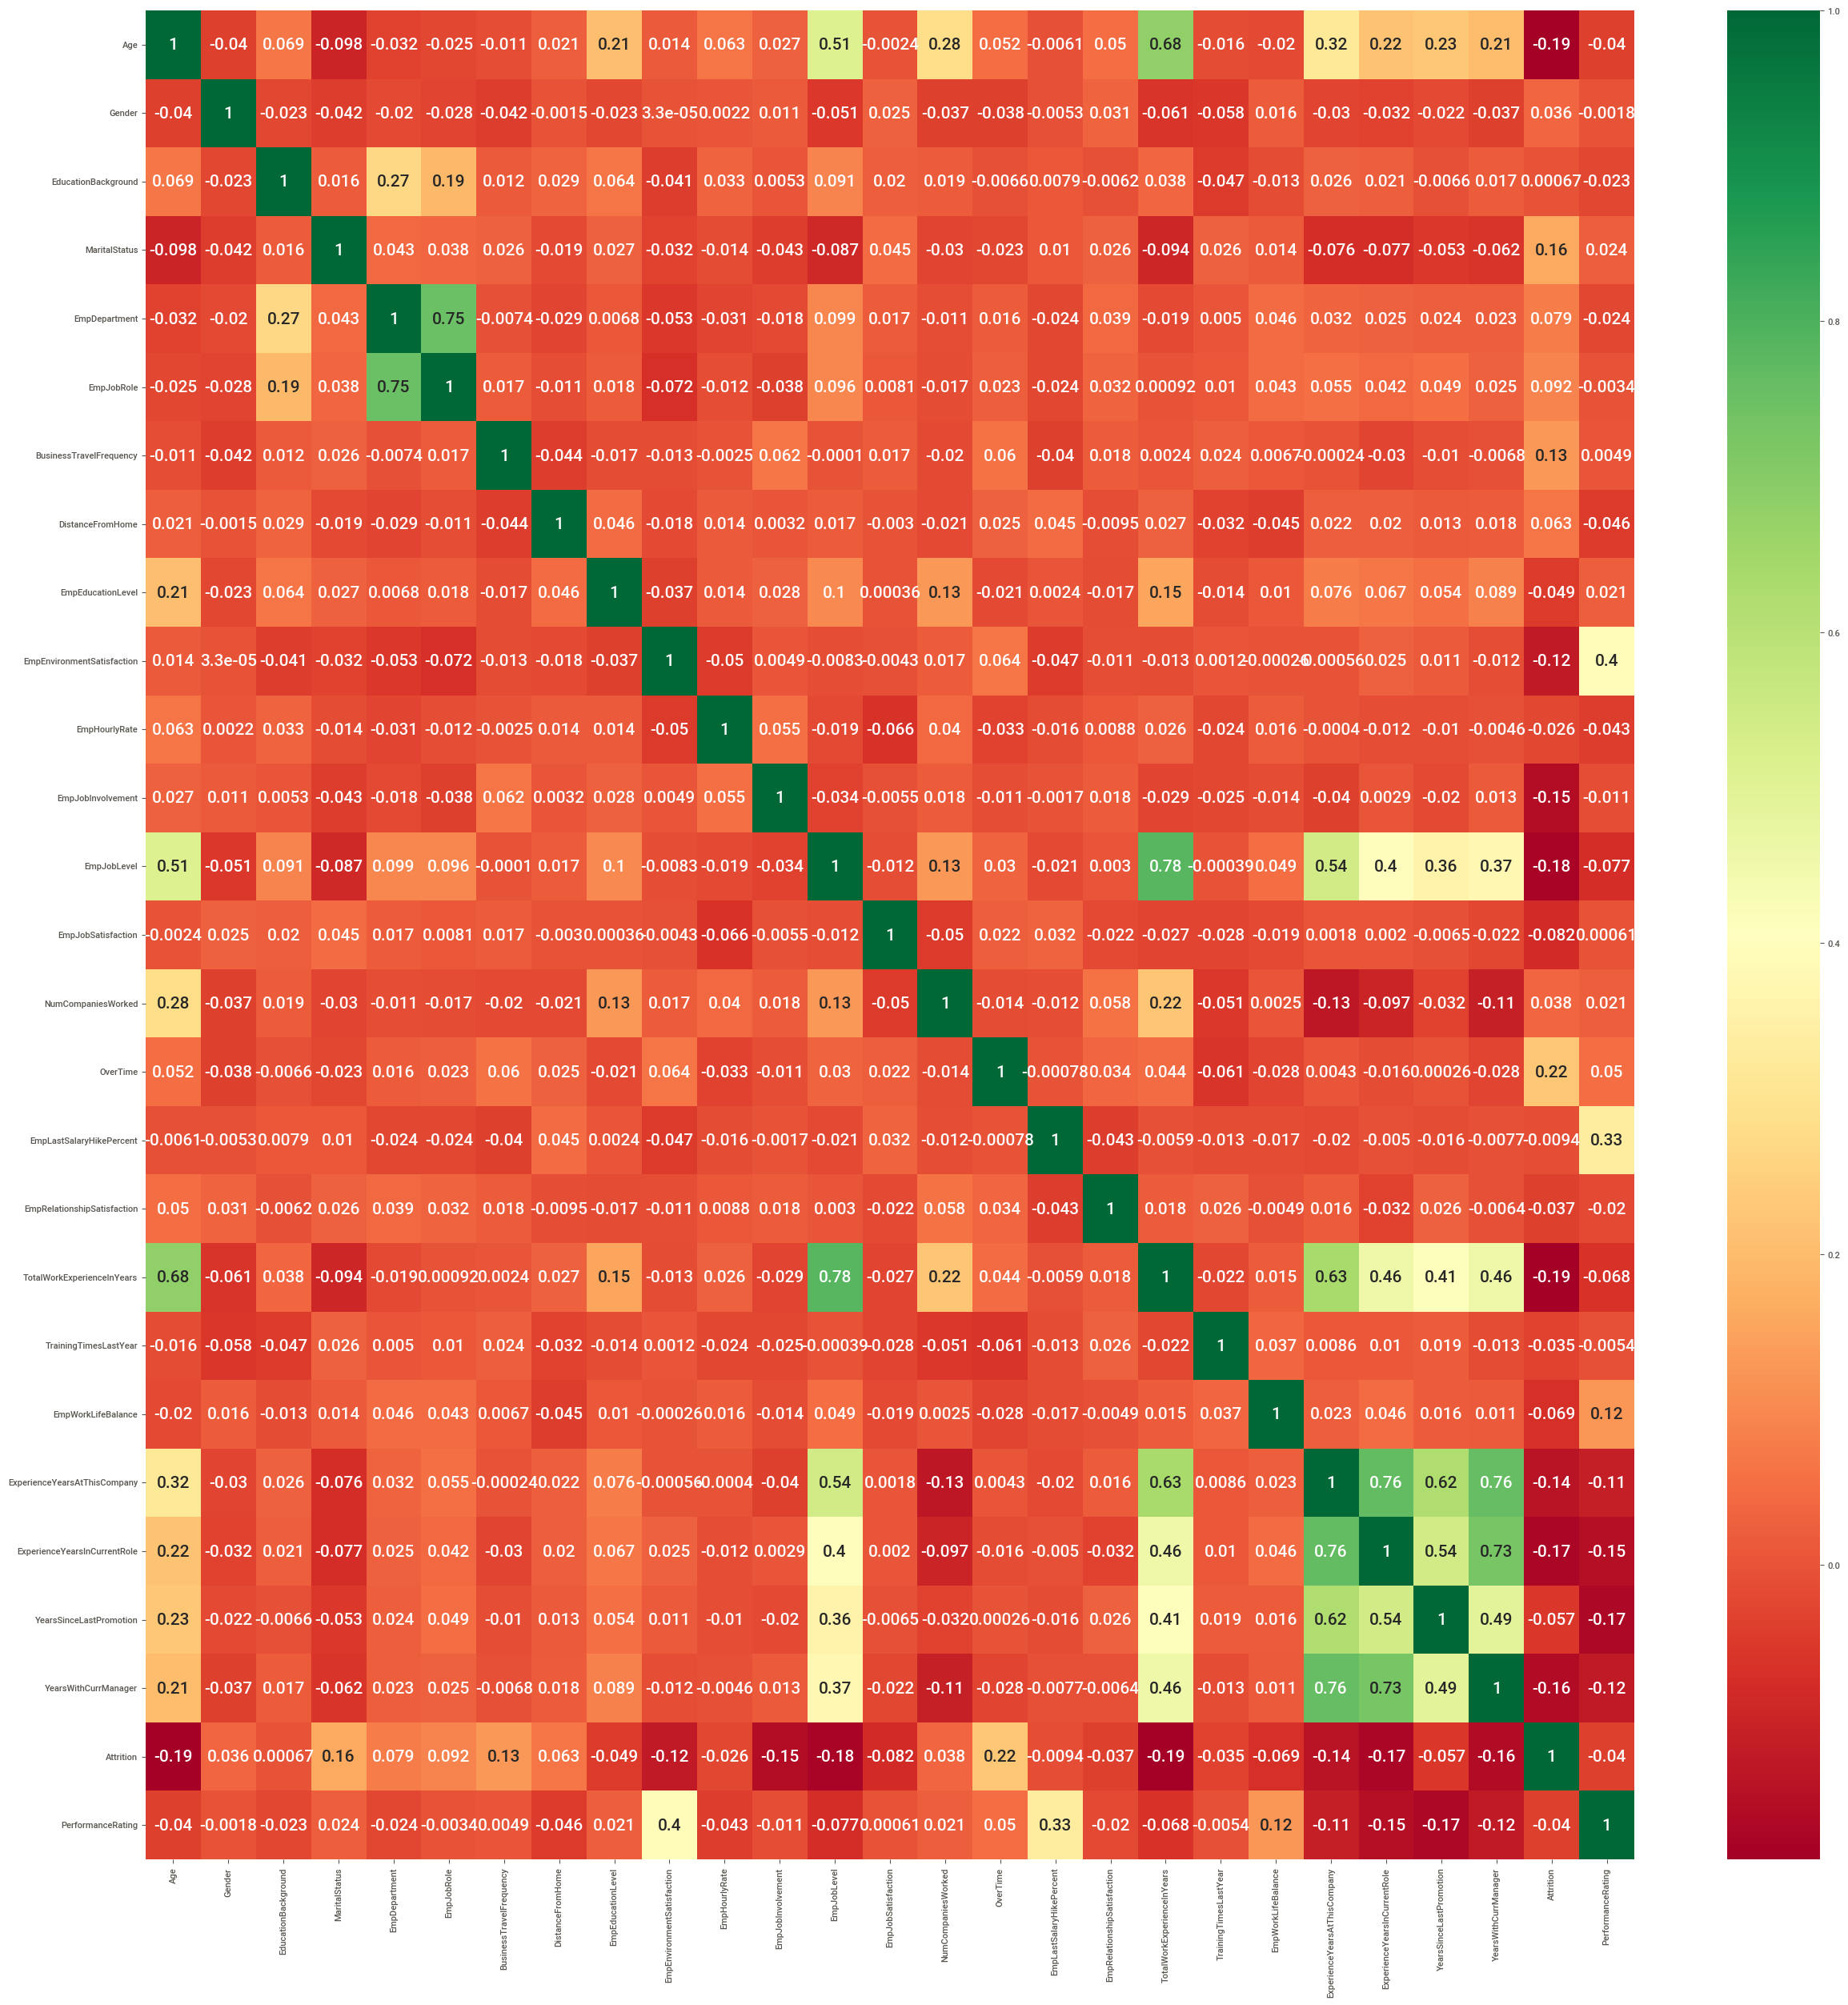

In [263]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(
    data.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap="RdYlGn",
    annot_kws={"size": 15}
)
plt.show()


* we can easily see in upper graph Gender,EmpJobRole,BusinessTravelFrequency,EmpJobSatisfaction,
 TrainingTimesLastYear this variables are very low correlated with target variables,So we can drop them.
* EmpLastSalaryHikePercent,YearsSinceLastPromotion,ExperienceYearsInCurrentRole are __top three__ features which are affecting employee performance rating.

In [265]:
# here we are going to drop that columns which are not necessary
data.drop(["Gender","EmpJobRole","TrainingTimesLastYear","BusinessTravelFrequency","EmpJobSatisfaction","EmpJobInvolvement",],axis=1,inplace=True)

In [266]:
data.describe() # it's showing us statistical calculation

,Age,EducationBackground,MaritalStatus,EmpDepartment,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,2.958333,1.096667,2.955833,9.165833,2.89250,2.715833,65.981667,2.067500,2.665000,0.294167,15.222500,2.725000,11.330000,2.744167,7.077500,4.291667,2.194167,4.105000,0.148333,0.948333
std,9.087289,1.468580,0.731050,1.678163,8.176636,1.04412,1.090599,20.211302,1.107836,2.469384,0.455857,3.625918,1.075642,7.797228,0.699374,6.236899,3.613744,3.221560,3.541576,0.355578,0.518866
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,30.000000,1.000000,0.000000,0.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,1.000000,2.000000,2.00000,2.000000,48.000000,1.000000,1.000000,0.000000,12.000000,2.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,36.000000,4.000000,1.000000,3.000000,7.000000,3.00000,3.000000,66.000000,2.000000,2.000000,0.000000,14.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,1.000000
75%,43.000000,4.000000,2.000000,5.000000,14.000000,4.00000,4.000000,83.000000,3.000000,4.000000,1.000000,18.000000,4.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,1.000000
max,60.000000,5.000000,2.000000,5.000000,29.000000,5.00000,4.000000,100.000000,5.000000,9.000000,1.000000,25.000000,4.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,2.000000


In [270]:
## Removing constant features
data.drop("EmpNumber",axis=1,inplace=True) # EmpNumber is not requried

# Model Creation

In [273]:
## Creating independent and dependent variable 
X = data.drop('PerformanceRating', axis=1)#independent variable
y = data.PerformanceRating # dependent variable 

## Balancing the data

In [276]:
## Balacing the data 
from collections import Counter # importing counter to check count of each label
from imblearn.over_sampling import SMOTE
sm=SMOTE()#object creation
print(Counter(y)) # cheking count for each class
X_sm,y_sm=sm.fit_resample(X,y) #applying sampling on target variable
print(Counter(y_sm))# cheking count after sampling for each class

Counter({1: 874, 0: 194, 2: 132})
Counter({1: 874, 2: 874, 0: 874})


In [278]:
# praparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.21,random_state=3)

# Model Selection

## DecisionTreeClassifier

In [282]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt = DecisionTreeClassifier()#object creation for decision tree
dt.fit(X_train,y_train) #training the model
y_hat=dt.predict(X_test) #prediction
y_train_predict = dt.predict(X_train)#predicting training data to chek training performance

In [284]:
#Evulauting the model
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc=accuracy_score(y_test,y_hat) #testing accuracy
f1_1 = f1_score(y_test,y_hat,average="weighted")

In [286]:
print("accuracy_score :", accuracy_score(y_test,y_hat))
print("precision_score :", precision_score(y_test,y_hat,average="weighted"))
print("recall_score :", recall_score(y_test,y_hat,average="weighted"))
print("F1_score :", f1_score(y_test,y_hat,average="weighted"))

accuracy_score : 0.8947368421052632
precision_score : 0.8943829496116301
recall_score : 0.8947368421052632
F1_score : 0.8944402695004466


In [288]:
print(classification_report(y_test,y_hat))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       184
           1       0.86      0.85      0.86       180
           2       0.90      0.89      0.89       187

    accuracy                           0.89       551
   macro avg       0.89      0.89      0.89       551
weighted avg       0.89      0.89      0.89       551



In [290]:
pd.crosstab(y_test,y_hat)#it will show you confusion matrix

col_0,0,1,2
PerformanceRating,,,
0,174,9,1
1,10,153,17
2,6,15,166


# Hyperparameters of DecisionTree
* Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model               architecture.


* Criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and         "entropy" for the information gain.


* Splitter: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered.



* max_depth: This determines the maximum depth of the tree.  we use a depth of two to make our decision tree. ... This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting..The tree perfectly fits the training data and fails to generalize on testing data.



* min_samples_split:Ideal range is 1 to 40.min_samples_split specifies the minimum number of samples required to split an internal node, while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.



* min_samples_leaf: The minimum number of samples required to be at a leaf node.Similarr to min sample split ,this describes the minimum number of samples at the leaf,the base of tree.Ideal range is 1 to 20.(thershold value to make a decision)like 40


In [293]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [295]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})


In [299]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Bestparamters: ({'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})


In [301]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [303]:
tree_cv.best_score_#getting best score form cv

np.float64(0.8952278081894894)

In [305]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf= 1,min_samples_split=3,splitter='best')#passing best parameter to decision tree

In [307]:

dt1.fit(X_train,y_train)#traing model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

In [309]:
y_hat1=dt1.predict(X_test)#predicting
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy
test_f1=f1_score(y_test,y_hat1,average="weighted")#f1_score

In [311]:
print("accuracy_score :", accuracy_score(y_test,y_hat1))
print("precision_score :", precision_score(y_test,y_hat1,average="weighted"))
print("recall_score :", recall_score(y_test,y_hat1,average="weighted"))
print("F1_score :", f1_score(y_test,y_hat1,average="weighted"))

accuracy_score : 0.9219600725952813
precision_score : 0.9220096137015664
recall_score : 0.9219600725952813
F1_score : 0.9217609886335372


In [313]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       184
           1       0.92      0.88      0.90       180
           2       0.90      0.92      0.91       187

    accuracy                           0.92       551
   macro avg       0.92      0.92      0.92       551
weighted avg       0.92      0.92      0.92       551



# Logistic Regression

In [316]:
from sklearn.linear_model import LogisticRegression  # assign Logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train) # fit the model

LogisticRegression()

In [318]:
y_pred = lr.predict(X_test) # predict the model
acc1 = accuracy_score(y_pred,y_test) # checking accuracy score
f1_2 = f1_score(y_pred,y_test,average="weighted") # checking f1 score

In [320]:
print("accuracy_score :", accuracy_score(y_test,y_pred))
print("precision_score :", precision_score(y_test,y_pred,average="weighted"))
print("recall_score :", recall_score(y_test,y_pred,average="weighted"))
print("F1_score :", f1_score(y_test,y_pred,average="weighted"))

accuracy_score : 0.8130671506352087
precision_score : 0.8137827402752199
recall_score : 0.8130671506352087
F1_score : 0.8132539395589048


In [322]:
confusion_matrix(y_test,y_pred) # checking confusion metrix

array([[148,  23,  13],
       [ 17, 145,  18],
       [ 13,  19, 155]])

In [324]:
print(classification_report(y_test,y_pred)) # checking classification report of model

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       184
           1       0.78      0.81      0.79       180
           2       0.83      0.83      0.83       187

    accuracy                           0.81       551
   macro avg       0.81      0.81      0.81       551
weighted avg       0.81      0.81      0.81       551



# RandomForestClassifier

In [327]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [329]:
y_predict=rf_clf.predict(X_test)#testing

In [331]:
acc2 = accuracy_score(y_test,y_predict)# checking accuracy
f1_3 = f1_score(y_test,y_predict,average="weighted")
print("accuracy_score :", accuracy_score(y_test,y_predict))
print("precision_score :", precision_score(y_test,y_predict,average="weighted"))
print("recall_score :", recall_score(y_test,y_predict,average="weighted"))
print("F1_score :", f1_score(y_test,y_predict,average="weighted"))

accuracy_score : 0.9528130671506352
precision_score : 0.9533769622084654
recall_score : 0.9528130671506352
F1_score : 0.952714307391465


In [333]:
print(classification_report(y_test,y_predict))# checking classification report for model performance

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       184
           1       0.94      0.94      0.94       180
           2       0.98      0.93      0.95       187

    accuracy                           0.95       551
   macro avg       0.95      0.95      0.95       551
weighted avg       0.95      0.95      0.95       551



# XGBClassifier

In [336]:
import xgboost as xg    #importing xgboost with alias name xg
from xgboost import XGBClassifier   #calling XGBRegressor
xgb_r = xg.XGBClassifier(n_estimators=200,seed = 123)#assign in variable
xgb_r.fit(X_train, y_train)# Fitting the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [338]:
xgb_pred = xgb_r.predict(X_test)# Predict the model

acc_3 = accuracy_score(y_test,xgb_pred)  #checking r2 score
f1_4 = f1_score(y_test,xgb_pred,average="weighted")

In [340]:
print("accuracy_score :", accuracy_score(y_test,xgb_pred))
print("precision_score :", precision_score(y_test,xgb_pred,average="weighted"))
print("recall_score :", recall_score(y_test,xgb_pred,average="weighted"))
print("F1_score :", f1_score(y_test,xgb_pred,average="weighted"))

accuracy_score : 0.9600725952813067
precision_score : 0.9601492166351279
recall_score : 0.9600725952813067
F1_score : 0.959979441572196


In [342]:
confusion_matrix(y_test,xgb_pred) # checking confusion metrix

array([[182,   2,   0],
       [  6, 169,   5],
       [  2,   7, 178]])

In [347]:
print(classification_report(y_test,xgb_pred))# checking classification report for model performance

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       184
           1       0.95      0.94      0.94       180
           2       0.97      0.95      0.96       187

    accuracy                           0.96       551
   macro avg       0.96      0.96      0.96       551
weighted avg       0.96      0.96      0.96       551



# hyperparameter tunning of XGBClassifier

In [350]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=3,verbosity=2,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=3, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[13:22:09] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (2071, 20, 41420).
Best paramters: {'reg_lambda': 0.8, 'reg_alpha': 0.4, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0})


In [360]:
XGB2=XGBClassifier(reg_lambda= 0.8, reg_alpha= 0.4, n_estimators=100, max_depth=5, learning_rate= 0.25, gamma=0)
XGB2.fit(X_train, y_train)#training 
y_predict=XGB2.predict(X_test)#testing
f1_score(y_predict,y_test,average="weighted")#checking performance

0.9638687711219648

In [362]:
xghy = accuracy_score(y_predict,y_test)#checking performance
xghy

0.9637023593466425

In [364]:
confusion_matrix(y_predict,y_test) # checking confusion metrix

array([[184,   6,   2],
       [  0, 169,   7],
       [  0,   5, 178]])

# MLPClassifier

In [367]:
## model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(100,50,3),
                       learning_rate_init=0.001,
                       max_iter=200,random_state=78) ## model object creation max_iter=Stopping parameter
model.fit(X_train,y_train) ## training the data

MLPClassifier(hidden_layer_sizes=(100, 50, 3), random_state=78)

In [369]:
y_predict_proba = model.predict(X_test) ## predicting the probability of class
y_train_predict = model.predict(X_train) # predicting the train data

In [371]:
y_predict_proba = model.predict(X_test)
acc4 = accuracy_score(y_test,y_predict_proba)# checking accuracy score
f1_5 = f1_score(y_predict_proba,y_test,average="weighted")
acc4

0.7931034482758621

In [373]:
print(classification_report(y_test,y_predict_proba))# checking classification report for model performance

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       184
           1       0.78      0.62      0.69       180
           2       0.90      0.96      0.93       187

    accuracy                           0.79       551
   macro avg       0.79      0.79      0.79       551
weighted avg       0.79      0.79      0.79       551



# Support vector classifier

In [376]:
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovr')

In [378]:
svc.fit(X_train,y_train)

SVC()

In [380]:
y_pred4 = svc.predict(X_test)
acc5 = accuracy_score(y_test,y_pred4)# checking accuracy score
f1_6 = f1_score(y_test,y_pred4,average="weighted")
acc5

0.7259528130671506

In [382]:
print(classification_report(y_test,y_pred4))# checking classification report for model performance


              precision    recall  f1-score   support

           0       0.72      0.68      0.70       184
           1       0.65      0.61      0.63       180
           2       0.80      0.88      0.84       187

    accuracy                           0.73       551
   macro avg       0.72      0.72      0.72       551
weighted avg       0.72      0.73      0.72       551



# Cross Validation

In [385]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc,X,y,scoring="accuracy",cv=5)
scores

array([0.72916667, 0.72916667, 0.72916667, 0.72916667, 0.725     ])

# Hyperparameter tunning for SVC

In [388]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(svc, param_grid, scoring="accuracy", verbose = 3)

In [390]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.335 total time=   0.5s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.333 total time=   0.5s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.336 total time=   0.4s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.336 total time=   0.6s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.336 total time=   0.4s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.335 total time=   0.3s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.3s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.336 total time=   0.3s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.336 total time=   0.3s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.336 total time=   0.3s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.663 total time=   0.3s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy', verbose=3)

In [394]:
y_pred6 = grid.predict(X_test)
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [396]:
svc = SVC(C = 10,gamma = 0.01,random_state=42)

In [398]:
svc.fit(X_train,y_train)

SVC(C=10, gamma=0.01, random_state=42)

In [400]:
y_pred6 = svc.predict(X_test)
acc5hy = accuracy_score(y_test,y_pred6)
f1_6hy = f1_score(y_test,y_pred6,average="weighted")

In [402]:
acc5hy

0.956442831215971

# Model Comparsion Report

In [405]:
# creating model comparison report using DataFrame
score = pd.DataFrame({"Model":["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","XGBoost Classifier","ANN_MLPClassifier","SVC"],
                     "Accuracy":[acc1*100,acc*100,acc2*100,acc_3*100,acc4*100,acc5*100],
                     "f1_score":[f1_1,f1_2,f1_3,f1_4,f1_5,f1_6],
                     "Hyperparameter":["Not available",acc_test*100,"Not available",xghy*100,"Not available",acc5hy*100]})

In [407]:
score

,Model,Accuracy,f1_score,Hyperparameter
0,LogisticRegression,81.306715,0.894440,Not available
1,DecisionTreeClassifier,89.473684,0.812880,92.196007
2,RandomForestClassifier,95.281307,0.952714,Not available
3,XGBoost Classifier,96.007260,0.959979,96.370236
4,ANN_MLPClassifier,79.310345,0.797018,Not available
5,SVC,72.595281,0.723071,95.644283


# Conclusion of Model Comparison Report

I have used 6 Algorithmns which name are LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XG Boost,SVC and ANN_MLPClassifier for training the model. I got __96.91 percentage in XGBoost Classifier with hyperparameter tunning__ which are maximum than all Algorithmn and its working Mindblowing and model predict perfect result. So,I am perfering XGBoost Classifier with hyperparameter tunning for checking the Performance Rating of Employee.

# Data Analysis Report

The project is a machine learning model to classify Performance Rating of Employee. The dataset contained 28 variables for verify Performance rating of employee. The project was divided into several steps, including data exploration, data preprocessing, building and training machine learning models, and evaluating model performance.

During data exploration, we analyzed the dataset to get a better understanding of the data. We observed that the dataset was not balanced,target labels was unbalanced. We also noticed that this dataset contains lots of categorical columns we have to change caregorical variables into numerical for training,Even some variables are not nesecassry for creating model So, we have to drop that columns.

For data preprocessing,we have to fixed wrong datatypes of columns and we used LabelsEncoders and manually Encoding for change categorical variables into numerical variables.Even we droped unnecessary variables. We also droped that columns which has no relationship with target variables for reduced overfitting and underfitting of model.

We built machine learning models by applying LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XG Boost,SVC and ANN_MLPClassifier for training the model . We trained these models on the original datasets and evaluated their performance using accuracy, recall score, precision score and F1 score. We also more focused on recall and precision score getting best model.

# Report on Challenges faced

Features Selection : this dataset has 35 columns and Some columns are not co-related with target variables,So i had to droped that columns.

Getting Insights : I faced problem in getting insights because some variables having more than 5 unique value it's difficult to get perfect insight from that columns which has more unique value when we compared target variables.

Model Selection:- I faced problem when i was go for selecting model because some model almost giving same accuracy then i had to focused on classification report for selecting model.

##  Recommendations to improve the employee performance based on insights from analysis.

We have to focus on that employee which are belong from Sales,Finance and Research & development department.company will have to give facility of employee who travel more than 15 km for coming office and company should give overtime for all employee.we also noticed that employee who didn't get salary hike more than 20% their performance are seem to bad company should give minimum 30% of hike to employee.Even we noticed that which employee are working in this company last 15 year they performance are seem to bad we have to change their manager or we have to give some salary hike,and that employee who are doing their job in one role last 5 year their performance rating are seem to bad.So, company have to change their role in company.Even that employee who didn't get promotion last 4 to 5 year their performance are seem to bad company should also change their role or give promtion who are deserve.

                                                  __Thank You__